# ICU Mortality Prediction

## Contents
- [Introduction](#introduction)
    - [MIMIC III Database](#mimiciii-database)
    - [Problem Statement](#problem-statement)
- [Exploratory Data Analysis](#eda)
- [Feature Engineering](#feature_engineering)
- [Model Development](#model_development)
- [Model Analysis](#model_analysis)
- [Conclusions](#conclusions)
- [Acknowledgements](#acknowledgements)

In [3]:
%%html
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js"></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-Cell-inputArea').hide();
     $('div.input').hide();
 } else {
 $('div.jp-Cell-inputArea').show();
     $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>

## Introduction <a class="anchor" id="introduction"></a>

<b>MIMIC III Database</b><a class="anchor" id="mimiciii-database"></a><br>
The Medical Information Mart for Intensive Care III (MIMIC III) database contains deidentified records of **46,520** patients admitted to critical care units at *Beth Israel Deaconess Medical Center* between *2001* and *2012*. In total, **61,532** intensive care unit stays were recorded. **53,432** stays were adult patients and **8,100** stays were neonatal patients. 

<b>Problem Statement</b><a class="anchor" id="problem-statement"></a><br>
Study factors which influence an intensive care patient's survival and build a classifier machine learning model to predict patient mortality.

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [16]:
import os
import psycopg2
import pandas as pd

# notebook options
import warnings
warnings.filterwarnings('ignore')

In [17]:
# connecting to postgres database
POSTGRESUSER = os.environ['POSTGRESUSER']
POSTGRESPWD = os.environ['POSTGRESPWD']

conn = psycopg2.connect("dbname=mimic user={} password={}".format(POSTGRESUSER,POSTGRESPWD))
cur = conn.cursor()

In [18]:
querystr = 'select * from mimiciii.patients'
patients = pd.read_sql_query(querystr, conn)

In [19]:
querystr = 'select * from mimiciii.admissions'
admissions = pd.read_sql_query(querystr, conn)

In [20]:
staycount = admissions.groupby('subject_id').agg(staycount=('row_id','count'))
patients = patients.join(staycount, how='left', on='subject_id')

In [21]:
querystr = 'select * from mimiciii.admissions where subject_id=249'
query3 = pd.read_sql_query(querystr, conn)

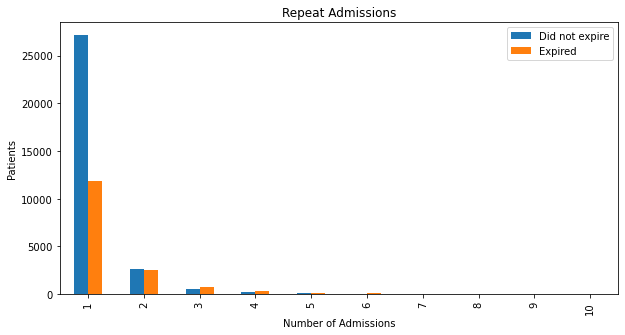

In [130]:
stay_exp = patients.groupby(['staycount','expire_flag']).agg(number_of_patients=('row_id','count'))
stay_exp = stay_exp[stay_exp.index.get_level_values('staycount')<=10]

fig=stay_exp.reset_index().pivot(index='staycount', columns='expire_flag', values='number_of_patients')\
    .plot.bar(figsize=(10,5), title='Repeat Admissions', 
              xlabel='Number of Admissions',ylabel='Patients')
fig.legend(['Did not expire', 'Expired']);

Patients with repeat ICU admissions did not exhibit a decreased chance of survival.

In [136]:
cur.close()
conn.close()

## Feature Engineering<a class="anchor" id="feature_engineering"></a>

## Model Development<a class="anchor" id="model_development"></a>

## Model Analysis<a class="anchor" id="model_analysis"></a>

## Conclusions<a class="anchor" id="conclusions"></a>

## Acknowledgements <a class="anchor" id="acknowledgements"></a>
The MIMIC III database was made available through the efforts of MIT Laboratory for Computational Physiology and collaborating research groups and supported by National Institute of Biomedical Imaging and Bioengineering (NIBIB) of the National Institutes of Health (NIH). <br><br>
Pollard, T. J. & Johnson, A. E. W. The MIMIC-III Clinical Database http://dx.doi.org/10.13026/C2XW26 (2016).


In [40]:
# cli code to convert notebook to html
!jupyter nbconvert --to html icu_mortality_prediction.ipynb --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' --TagRemovePreprocessor.remove_input_tags='{"hide-input"}'


C:\ProgramData\Anaconda3\lib\site-packages\traitlets\traitlets.py:2199: FutureWarning: Supporting extra quotes around Unicode is deprecated in traitlets 5.0. Use 'remove_cell' instead of "'remove_cell'" – or use CUnicode.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\traitlets\traitlets.py:2199: FutureWarning: Supporting extra quotes around Unicode is deprecated in traitlets 5.0. Use 'hide-input' instead of "'hide-input'" – or use CUnicode.
  FutureWarning)
[NbConvertApp] Converting notebook icu_mortality_prediction.ipynb to html
[NbConvertApp] Writing 598130 bytes to icu_mortality_prediction.html
